In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def prec_recall_fixed_thr(df, graph_title = 'Precision and recall'):
        avgs = df.groupby(['threshold']).mean()[['precision','recall']]
        stds = df.groupby(['threshold']).std()[['precision','recall']]
        stds.columns = ['prec_std', 'rec_std']
        to_plot = pd.concat([avgs, stds], axis=1)
        to_plot['prec_lower'] = to_plot.precision - to_plot.prec_std
        to_plot['prec_upper'] = to_plot.precision + to_plot.prec_std
        to_plot['rec_lower'] = to_plot.recall - to_plot.rec_std
        to_plot['rec_upper'] = to_plot.recall + to_plot.rec_std
        to_plot['thr_percent'] = 100*to_plot.index

        fig, ax = plt.subplots()
        ax.scatter(to_plot.thr_percent, to_plot.precision, color = 'blue', alpha = 0.5, label="Precision")
        ax.fill_between(to_plot.thr_percent, to_plot.prec_upper, to_plot.prec_lower, color='blue', alpha=.2)
        ax.scatter(to_plot.thr_percent, to_plot.recall, color = 'red', alpha = 0.5, label="Recall")
        ax.fill_between(to_plot.thr_percent, to_plot.rec_upper, to_plot.rec_lower, color='red', alpha=.2)
        
        ax.set_title(graph_title)
        ax.set_xlim(left=0.05)
        ax.set_xlabel('Probability of positive, at which the image is predicted positive, %')
        ax.legend(loc='lower right')
        print(to_plot.head())

           precision    recall  prec_std   rec_std  prec_lower  prec_upper  \
threshold                                                                    
0.0000      0.079435  1.000000  0.000000  0.000000    0.079435    0.079435   
0.0005      0.328663  0.911111  0.098971  0.050918    0.229692    0.427635   
0.0010      0.370619  0.906667  0.108928  0.048813    0.261691    0.479547   
0.0015      0.392927  0.904444  0.110314  0.048813    0.282613    0.503241   
0.0020      0.412866  0.902222  0.112596  0.049316    0.300270    0.525462   

           rec_lower  rec_upper  thr_percent  
threshold                                     
0.0000      1.000000   1.000000         0.00  
0.0005      0.860194   0.962029         0.05  
0.0010      0.857854   0.955480         0.10  
0.0015      0.855631   0.953258         0.15  
0.0020      0.852906   0.951539         0.20  


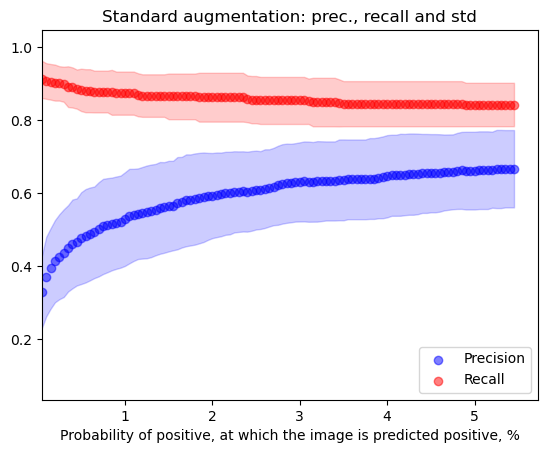

In [5]:
dfs = []
for i in range (5):
    dfs.append(pd.read_csv(f'prec_rec_B0224_raw_{i}.csv', delimiter='\t'))
df = pd.concat(dfs, axis=0)
prec_recall_fixed_thr(df, graph_title = 'Standard augmentation: prec., recall and std')

           precision    recall  prec_std   rec_std  prec_lower  prec_upper  \
threshold                                                                    
0.0000      0.079449  1.000000  0.000031  0.000000    0.079418    0.079481   
0.0005      0.219256  0.951111  0.055623  0.027889    0.163633    0.274879   
0.0010      0.253490  0.944444  0.067531  0.022222    0.185959    0.321020   
0.0015      0.275494  0.935556  0.076532  0.016480    0.198963    0.352026   
0.0020      0.294244  0.924444  0.083133  0.016480    0.211111    0.377376   

           rec_lower  rec_upper  thr_percent  
threshold                                     
0.0000      1.000000   1.000000         0.00  
0.0005      0.923222   0.979000         0.05  
0.0010      0.922222   0.966667         0.10  
0.0015      0.919075   0.952036         0.15  
0.0020      0.907964   0.940925         0.20  


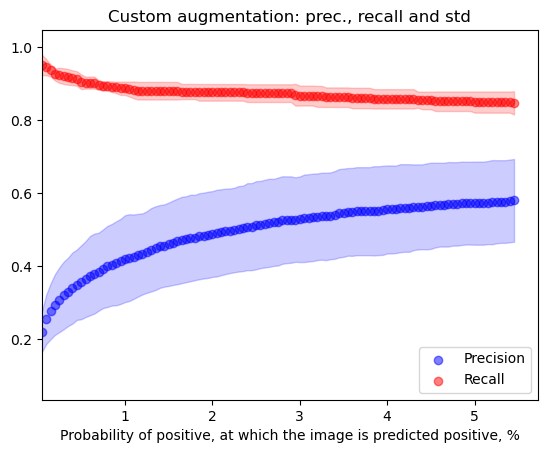

In [7]:
dfs = []
for i in range (5):
    dfs.append(pd.read_csv(f'prec_rec_B0224_cust_aug_{i}.csv', delimiter='\t'))
df = pd.concat(dfs, axis=0)
prec_recall_fixed_thr(df, graph_title = 'Custom augmentation: prec., recall and std')

In [48]:
df

,threshold,precision,recall
0,0.0000,0.097561,0.044444
1,0.0005,NaN,0.000000
2,0.0010,NaN,0.000000
3,0.0015,NaN,0.000000
4,0.0020,NaN,0.000000
...,...,...,...
105,0.0525,NaN,0.000000
106,0.0530,NaN,0.000000
107,0.0535,NaN,0.000000
108,0.0540,NaN,0.000000
